# Contents
#1. Data Loading
#2. Data Cleaning
#3. Data Exploration
#4. Data Preprocessing
#5. Data Modeling

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('error', message=".*check_inverse*.", category=UserWarning, append=False)

In [2]:
df= pd.read_csv('final_test.csv')

In [3]:
df.head(10)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
5,50,27.0,160.02,S
6,53,65.0,160.02,M
7,51,33.0,160.02,XXS
8,54,26.0,167.64,M
9,53,32.0,165.10,S


In [4]:
df.shape

(119734, 4)

In [5]:
df.isnull().any()

weight    False
age        True
height     True
size      False
dtype: bool

In [6]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [7]:
# Imputing missing values with Mean/Median
df['age']= df['age'].replace(np.NaN, df['age'].mean())
df['height']=df['height'].replace(np.NaN, df['height'].mean())
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [8]:
# OR
df['age']=df['age'].fillna(df['age'].mean())
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [9]:
df['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

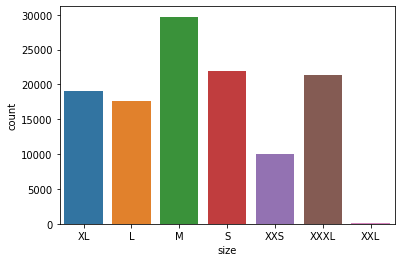

In [10]:
sns.countplot(x='size', data=df)

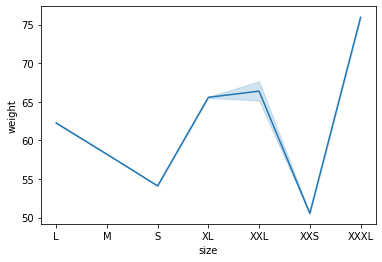

In [11]:
sns.lineplot(x='size',y='weight', data=df)

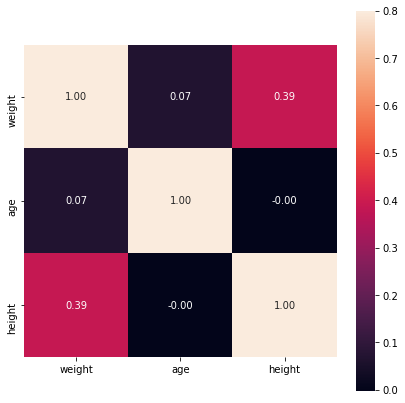

In [12]:
#sns.stripplot(x='size',y='weight', data=df, hue='size')
correlation = df.corr()
fig, axes = plt.subplots(figsize=(7, 7))
sns.heatmap(correlation, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

In [13]:
# Data Preprocessing
#from sklearn.preprocessing import OrdinalEncoder
#enc=OrdinalEncoder()

#scale_mapper={'L':1,'M':2,'S':3,'XL':4,'XXL':5,'XXS':6,'XXXL':7}
#df['size']=df['size'].replace(scale_mapper)
#df.head(10)

#OR
from sklearn.preprocessing import LabelEncoder

scale_mapper=['L','M','S','XL','XXL','XXS','XXXL']
le=LabelEncoder()
le=le.fit(scale_mapper)
df['size'] = le.fit_transform(df['size'].astype(str))
df.head(5)

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1


In [15]:
X=df.drop('size', axis=1, inplace=True)
#df.drop('id', axis=1, inplace=True)
y=df['size']

KeyError: "['size'] not found in axis"

In [16]:
# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

print(X_train)
print(y_train)

print(X_test)
print(y_test)

NameError: name 'y' is not defined

In [17]:
# Data Modeling

## 1. LogisticRegression
lr = LogisticRegression(solver="liblinear").fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
score_lr = cross_val_score(model, X_train, y_train, cv = 6)
accuracy_lr, score_lr

NameError: name 'X_train' is not defined

In [ ]:
## 2. NaiveBayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
score_nb = cross_val_score(model, X_train, y_train, cv = 6)
accuracy_nb, score_nb

In [ ]:
## 3. Stoachastic Gradient Descent
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=0)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
score_sgd = cross_val_score(model, X_train, y_train, cv = 6)
accuracy_sgd, score_sgd

In [ ]:
## 4. K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
score_knn = cross_val_score(model, X_train, y_train, cv = 6)
accuracy_knn, score_knn

In [ ]:
## 5. Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=0, max_features=None, min_samples_leaf=5)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
score = cross_val_score(model, X_train, y_train, cv = 6)
accuracy_dt, score_dt

In [ ]:
## 6. Random Forest
rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=3, random_state=0, max_features=None, min_samples_leaf=15)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
score_rf = cross_val_score(model, X_train, y_train, cv = 6)
accuracy_rf, score_rf

In [ ]:
## 7. Support vector Machine
svm = SVC(kernel="linear", C=1, random_state=0)
svm.fit(X_train,y_train)
y_pred_svm =svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
score_svm = cross_val_score(model, X_train, y_train, cv = 6)
accuracy_svm, score_svm

In [ ]:
labels = ['LR', 'NB', 'SDG','KNN', 'DT', 'RF', 'SVM']
accuracies = [accuracy_lr, accuracy_nb, accuracy_sdg, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_svm]

x = [0,1,2,3,4,5,6]
width=0.35

fig, ax = plt.subplots()
ax.bar(x=labels,height=accuracies)

ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracy of ML models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred_))